<a href="https://colab.research.google.com/github/Saket03-P/Ethereum-Transactions-Fraud-Detection/blob/main/Mini_Project_CTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Data Generation for Ethereum Transactions Fraud Dataset using CTGANSynthesizer from sdv package

[CTGANSynthesizer Docs](https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/ctgansynthesizer)

[CTGAN Loss Functions](https://colab.research.google.com/drive/1RbIYxkbPP3JQY7W0S1p_XprY25wOYTPL?usp=sharing&ref=sdv.ghost.io)

[CTGAN Issue #980](https://github.com/sdv-dev/SDV/discussions/980)

- Connect to GPU Runtime for faster execution of the synthesizer.

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Restart runtime on running the following cell for the 1st time.
%pip install sdv==1.0.0rc0
%pip install sdmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Press** `Ctrl + M.` **to Restart Runtime on running the above installation command**

In [ ]:
# Mounting Google Drive for the csv files.

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# This cell is meant to be run when the runtime is RESTARTED.
# due to the installing of packages from pip.

path= '/content/gdrive/MyDrive/Mini_Project_2023/pre_processed_transaction_dataset_3.csv'
dfc= pd.read_csv(path)

dfc.sample(5)

,Unnamed: 0,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
6677,6677,Non - Fraud,4.30,18630.29,130442.18,7,7,0,34.122415,16.061480,16.061044,112.427305,0.003055,0.00000,0.000,0.0,0.0,0.0
3456,3456,Fraud,323.86,136.68,5770.12,6,28,0,2.000000,0.487614,2.274403,13.646419,0.006775,17109.00000,0.000,0.0,0.0,1.0
2356,2356,Fraud,1579.22,374.22,111150.90,41,124,0,0.005000,0.001976,0.004927,0.202000,0.043000,12723.16679,260.001,0.0,13.0,8.0
3757,3757,Non - Fraud,5.34,127607.06,382837.20,3,3,0,6.021215,3.729950,3.729369,11.188108,0.001743,0.00000,0.000,0.0,0.0,0.0
2022,2022,Non - Fraud,5.14,25734.14,231653.52,9,9,0,2.994600,0.481306,0.480782,4.327034,0.004716,0.00000,0.000,0.0,0.0,0.0


In [ ]:
# since the csv file creation causes an extra column to be appended to the dataframe.

dfc.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [ ]:
# Obtain the dataset metadata.
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data= dfc)

# Synthesizer learning for 1500 epochs.
%%capture output
from sdv.single_table import CTGANSynthesizer

EPOCHS= 1500
synthesizer = CTGANSynthesizer(metadata, epochs= EPOCHS, verbose= True, enforce_min_max_values= True)
synthesizer.fit(dfc)

# save model with a descriptive name that includes the dataset and epochs
model_path = f'ctgan_model_ethereum_fraud_{EPOCHS}_epochs.pkl'
synthesizer.save(model_path)

# Generate Synthetic Samples.
dfsyn = synthesizer.sample(num_rows= dfc.shape[0])

# Concatenating both the datasets and generating new csv file.
dft= pd.concat([dfc, dfsyn], ignore_index=True)
path = '/content/gdrive/MyDrive/Mini_Project_2023/increased_transaction_dataset_1500.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  dft.to_csv(f)

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [ ]:
metadata.detect_from_dataframe(data= dfc)
metadata

{
    "columns": {
        "FLAG": {
            "sdtype": "categorical"
        },
        "Avg min between sent tnx": {
            "sdtype": "numerical"
        },
        "Avg min between received tnx": {
            "sdtype": "numerical"
        },
        "Time Diff between first and last (Mins)": {
            "sdtype": "numerical"
        },
        "Sent tnx": {
            "sdtype": "numerical"
        },
        "Received Tnx": {
            "sdtype": "numerical"
        },
        "Number of Created Contracts": {
            "sdtype": "numerical"
        },
        "max value received ": {
            "sdtype": "numerical"
        },
        "avg val received": {
            "sdtype": "numerical"
        },
        "avg val sent": {
            "sdtype": "numerical"
        },
        "total Ether sent": {
            "sdtype": "numerical"
        },
        "total ether balance": {
            "sdtype": "numerical"
        },
        " ERC20 total Ether received": {
      

In [ ]:
%%capture output
from sdv.single_table import CTGANSynthesizer

EPOCHS= 1500
synthesizer = CTGANSynthesizer(metadata, epochs= EPOCHS, verbose= True, enforce_min_max_values= True)
synthesizer.fit(dfc)

In [ ]:
# save model with a descriptive name that includes the dataset and epochs

model_path = f'ctgan_model_ethereum_fraud_{EPOCHS}_epochs.pkl'
synthesizer.save(model_path)

In [ ]:
# only for loading the synthesizer back.
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer.load(filepath= '/content/ctgan_model_ethereum_fraud_1500_epochs.pkl')

In [ ]:
dfsyn = synthesizer.sample(num_rows= dfc.shape[0])
dfsyn.sample(5)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
3752,Non - Fraud,0.00,0.000000,0.000000e+00,0,0,0,123.798773,120.483557,47.861803,805.486219,-1523.288455,2.299966e+07,0.000000e+00,0.000000,0.0,0.0
6402,Non - Fraud,3228.39,6704.191452,1.017375e+06,346,619,0,20.563527,12.237802,8.187633,2298.922117,-275.703467,0.000000e+00,1.926196e+06,0.000000,13.0,38.0
2850,Non - Fraud,11075.61,501.039831,7.332579e+05,125,20,0,88.792976,7.134573,10.101395,1931.227316,-165.758131,1.579473e+07,0.000000e+00,0.000000,1.0,14.0
8280,Non - Fraud,182.84,8700.654037,3.141250e+05,4,13,0,23.867610,9.246080,0.319602,0.000000,189.474758,3.950425e+06,0.000000e+00,6.657497,0.0,2.0
3250,Non - Fraud,35596.00,35249.447271,1.261154e+05,3,5,0,0.000000,0.000000,22.291612,393.050000,-942.260459,0.000000e+00,0.000000e+00,0.000000,1.0,6.0


In [ ]:
dfsyn.shape

(9841, 17)

In [ ]:
# from sdv.single_table import run_diagnostic
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(real_data= dfc, synthetic_data= dfsyn, metadata= metadata)

Creating report: 100%|██████████| 4/4 [03:10<00:00, 47.51s/it]


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

DANGER:
x The synthetic data is missing more than 50% of the numerical ranges present in the real data


In [ ]:
# CTGAN prints out a new line for each epoch
epochs_output = str(output).split('\n')

# CTGAN separates the values with commas
raw_values = [line.split(',') for line in epochs_output]
loss_values = pd.DataFrame(raw_values)[:-1] # convert to df and delete last row (empty)

# Rename columns
loss_values.columns = ['Epoch', 'Generator Loss', 'Discriminator Loss']

# Extract the numbers from each column 
loss_values['Epoch'] = loss_values['Epoch'].str.extract('(\d+)').astype(int)
loss_values['Generator Loss'] = loss_values['Generator Loss'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
loss_values['Discriminator Loss'] = loss_values['Discriminator Loss'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)

# the result is a row for each epoch that contains the generator and discriminator loss
loss_values.head()

,Epoch,Generator Loss,Discriminator Loss
0,1,0.2760,-1.0659
1,2,-0.7390,-0.7038
2,3,-1.5773,0.0675
3,4,-1.0068,0.1549
4,5,-0.6372,-0.3735


In [ ]:
import plotly.graph_objects as go

# Plot loss function
fig = go.Figure(data=[go.Scatter(x=loss_values['Epoch'], y=loss_values['Generator Loss'], name='Generator Loss'),
                      go.Scatter(x=loss_values['Epoch'], y=loss_values['Discriminator Loss'], name='Discriminator Loss')])

# Update the layout for best viewing
fig.update_layout(template='plotly_white',
                    legend_orientation="h",
                    legend=dict(x=0, y=1.1))

title = 'CTGAN loss function for dataset: Ethereum Transactions Fraud Dataset'
fig.update_layout(title=title, xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(dfc, dfsyn, metadata)

Creating report: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]



Overall Quality Score: 85.96%

Properties:
Column Shapes: 76.33%
Column Pair Trends: 95.59%


In [ ]:
quality_report.get_visualization('Column Shapes')

In [ ]:
from sdv.evaluation.single_table import get_column_plot

# Loop over the columns and generate a plot for each one
for col in dfc.columns:
    fig = get_column_plot(real_data= dfc, synthetic_data= dfsyn, column_name= col, metadata= metadata)
    fig.show()

In [ ]:
# Avg min between sent tnx: Average time between sent transactions for account in minutes
# Avg_min_between_received_tnx: Average time between received transactions for account in minutes
# Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction
# Sent_tnx: Total number of sent normal transactions
# Received_tnx: Total number of received normal transactions
# Number_of_Created_Contracts: Total Number of created contract transactions
# Max_Value_Received: Maximum value in Ether ever received
# Avg_Value_Received5Average value in Ether ever received
# Avg_Val_Sent: Average value of Ether ever sent
# Total_Ether_Sent:Total Ether sent for account address
# Total_Ether_Balance: Total Ether Balance following enacted transactions
# ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether
# ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether
# ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether
# ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses
# ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received
# ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction
# ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

In [ ]:
# get all the numerical columns from the metadata
all_columns = metadata.to_dict()['columns']

numerical_columns = [name for name, value in all_columns.items() if value['sdtype'] == 'numerical']

# apply the KSComplement all all the numerical columns
from sdmetrics.single_column import KSComplement

total_score = 0
for column_name in numerical_columns:
  column_score = KSComplement.compute(dfc[column_name], dfsyn[column_name])
  total_score += column_score
  print(column_name, ' : ', column_score)

print('\nAverage: ', total_score/len(numerical_columns))

Avg min between sent tnx  :  0.8155675236256478
Avg min between received tnx  :  0.832435728076415
Time Diff between first and last (Mins)  :  0.8028655624428411
Sent tnx  :  0.7724824712935677
Received Tnx  :  0.8294888730820038
Number of Created Contracts  :  0.9862818819225688
max value received   :  0.771872777156793
avg val received  :  0.7104969007214714
avg val sent  :  0.7674016868204451
total Ether sent  :  0.5879483792297531
total ether balance  :  0.4181485621379941
 ERC20 total Ether received  :  0.4392846255461843
 ERC20 total ether sent  :  0.8577380347525658
 ERC20 total Ether sent contract  :  0.4675337872167462
 ERC20 uniq sent addr  :  0.9593537242150187
 ERC20 uniq rec token name  :  0.9577278731836195

Average:  0.7485392744639774


In [ ]:
dft= pd.concat([dfc, dfsyn], ignore_index=True)

Non - Fraud    15329
Fraud           4353
Name: FLAG, dtype: int64


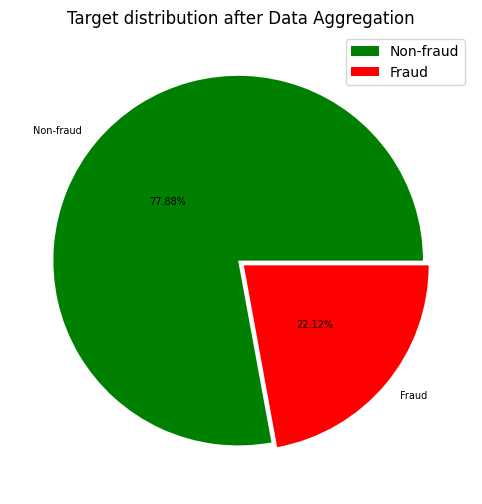

In [ ]:
# Distribution of Non Fraud to Fraud instances.
print(dft['FLAG'].value_counts())

# Pie Chart for distribution.
pie, ax = plt.subplots(figsize=[8,6])
labels = ['Non-fraud', 'Fraud']
colors = ['green', 'red']
plt.pie(x = dft['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 7}, colors = colors)
plt.title('Target distribution after Data Aggregation')
plt.legend()
plt.show()

In [ ]:
# Saving the new dataframe into the same google drive folder.
path = '/content/gdrive/MyDrive/Mini_Project_2023/increased_transaction_dataset_1500.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  dft.to_csv(f)

In [ ]:
%pip install packaging

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install --pre pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.2 MB/s eta 0:

In [ ]:
from pycaret.classification import *

In [ ]:
dft= dft.replace('Fraud', 1)
dft= dft.replace('Non - Fraud', 0)

In [ ]:
setup(dft, target= "FLAG", session_id= 85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(19682, 17)"
4,Transformed data shape,"(19682, 17)"
5,Transformed train set shape,"(13777, 17)"
6,Transformed test set shape,"(5905, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9313,0.9676,0.7982,0.8812,0.8371,0.7937,0.7957,2.9900
lightgbm,Light Gradient Boosting Machine,0.9300,0.9687,0.7860,0.8849,0.8322,0.7881,0.7906,0.4820
rf,Random Forest Classifier,0.9292,0.9657,0.7601,0.9051,0.8258,0.7818,0.7869,2.2780
et,Extra Trees Classifier,0.9241,0.9626,0.7332,0.9062,0.8100,0.7634,0.7704,1.3920
gbc,Gradient Boosting Classifier,0.9218,0.9581,0.7476,0.8812,0.8083,0.7596,0.7641,3.1940
ada,Ada Boost Classifier,0.9048,0.9447,0.7237,0.8253,0.7707,0.7110,0.7137,1.0290
dt,Decision Tree Classifier,0.8878,0.8402,0.7549,0.7427,0.7483,0.6761,0.6765,0.4610
knn,K Neighbors Classifier,0.8039,0.7807,0.4368,0.5749,0.4960,0.3773,0.3829,0.4990
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690
ridge,Ridge Classifier,0.7787,0.0000,0.0003,0.1000,0.0007,0.0001,0.0008,0.0560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

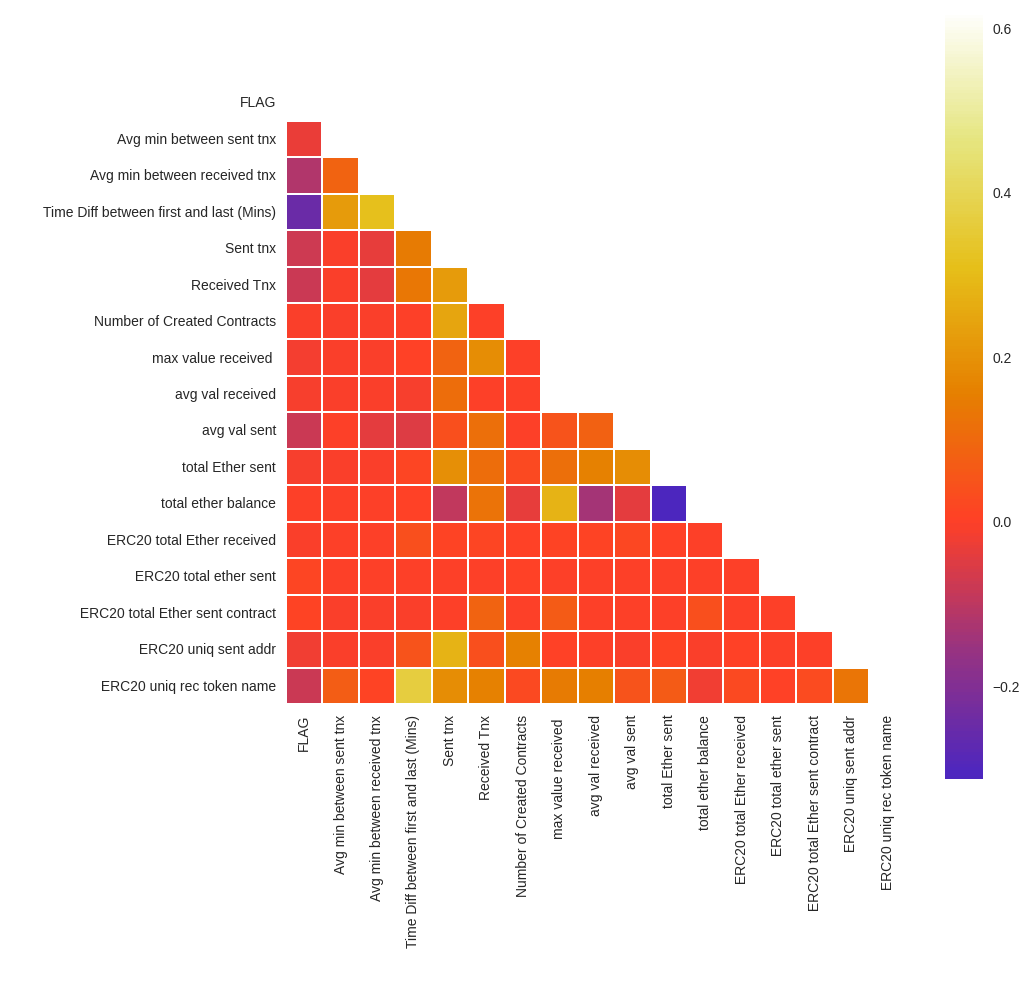

In [ ]:
# Rechecking the Correlation matrix.

corr = dft.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(corr, mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)